# Read the data and prepare multiple time series

The method of choice is the analysis givven in [1] for time series' in a high dimensional space. In order to be able to process the data we have 



[1] C. Uhl, Analyse raumzeitlicher Daten strukturbildender Systeme, Verlag Shaker (1995)

Still to be found:
[]  K. Karhunen, "Zur Spektraltheorie stochastischer Prozesse," Ann. Acad. Sci. Fenn. A1, Math. Phys. 37 (1946)
 M. Loeve, “Fonctions aleatoires de second ordre,” Comptes Rendus De L'Académie Des Sciences, vol. 220, (1945).

### Load the respective libraries

In [5]:
from bs4 import BeautifulSoup
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas

### Get the data

In [26]:
xl = pandas.read_excel('200320 Tabelle_Coronavirus-Faelle-BW.xls',skiprows=7) # Erzeuge den Pointer
#df = xl.parse("Fälle Coronavirus in BW", header=None)
#, names=['A', 'B', 'C','D', 'E', 'F','G','H','I']) # 'Parse' Objekt
xl.as_matrix()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


array([['Baden-Baden (Stadtkreis)', 21.0, 17.0, ..., nan, nan, nan],
       ['Biberach', 45.0, 45.0, ..., nan, nan, nan],
       ['Böblingen', 67.0, 28.0, ..., 1.0, nan, nan],
       ...,
       ['Summe', 3665.0, 2748.0, ..., 8.0, 4.0, 1.0],
       [nan, nan, nan, ..., nan, nan, nan],
       ['Hinweis: Es handelt sich bei den Zahlen immer um einen vorläufigen Datenstand. Änderungen sind durch Nachmeldungen und Streichungen möglich. Aufgrund des Meldeverzugs zwischen dem Bekanntwerden neuer Fälle vor Ort und der Übermittlung an das Landesgesundheitsamt kann es mitunter auch deutliche Abweichungen zu den von den kommunalen Gesundheitsämtern aktuell herausgegebenen Zahlen geben. Dafür bitten wir um Verständnis.',
        nan, nan, ..., nan, nan, nan]], dtype=object)

In [14]:
#html = open("table.html").read()
#soup = BeautifulSoup(html)
#table = soup.find("table")
filenameC='time_series_19-covid-Confirmed.csv'
filenameD='time_series_19-covid-Deaths.csv'
filenameR='time_series_19-covid-Recovered.csv'
#htmlC = open("TableC.html").read()
htmlC = open(filenameC).read()
soupC = BeautifulSoup(htmlC)
TableC = soupC.find("table")
htmlD = open(filenameD).read()
soupD = BeautifulSoup(htmlD)
TableD = soupD.find("table")
htmlR = open(filenameR).read()
soupR = BeautifulSoup(htmlR)
TableR = soupR.find("table")

### Extract the header row from TableC/D/R, read data from the table and create a dictionary with all countries and the total of confirmed cases

In [15]:
# TableC
# Header row
TableC_headrow= TableC.find('tr')
hcolumns = TableC_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableC_row in TableC.findAll('tr'):
    columns = TableC_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yC={}
for i in np.arange(1,422):
    key=output_rows[i][2]
    if key in yC: 
        yC[key]=yC[key]+np.asarray(output_rows[i][5:],dtype=int)
    else:
        yC[key]=np.asarray(output_rows[i][5:],dtype=int)
# The following should be the same for all three
x=np.arange(len(yC.get('Germany')))
# TableD
# Header row
TableD_headrow= TableD.find('tr')
hcolumns = TableD_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableD_row in TableD.findAll('tr'):
    columns = TableD_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yD={}
for i in np.arange(1,422):
    key=output_rows[i][2]
    if key in yD: 
        yD[key]=yD[key]+np.asarray(output_rows[i][5:],dtype=int)
    else:
        yD[key]=np.asarray(output_rows[i][5:],dtype=int)
# TableR
# Header row
TableR_headrow= TableR.find('tr')
hcolumns = TableR_headrow.findAll('th')
output_row = []
output_rows = []
for column in hcolumns: output_row.append(column.text)
output_rows.append(output_row)
# Table
for TableR_row in TableR.findAll('tr'):
    columns = TableR_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    if len(output_row) > 1: output_rows.append(output_row)
# Dictionary
yR={}
for i in np.arange(1,422):
    key=output_rows[i][2]
    if key in yR: 
        yR[key]=yR[key]+np.asarray(output_rows[i][5:],dtype=int)
    else:
        yR[key]=np.asarray(output_rows[i][5:],dtype=int)
#
# Temporarily suppressed
# Caution the following is only for logarithmic representation
# ylog=y.copy()
# for key in y.keys():
#    ylog[key]=np.log10(ylog[key]+1)
#
# numerical ordering of countries NOT USED YES
# numbered=dict(zip(np.arange(len(y.keys())),y.keys()))

### Define plotting functions for the data retrieved, linear plot and log plot

In [16]:
numbered=dict(zip(yC.keys(),np.arange(len(yC.keys()))))
def plotcountry(y,Country,istart):
    fig, ax = plt.subplots()
    for c in Country: 
        i=numbered[c]
        ax.plot(x[istart:],y.get(c)[istart:],label=c)
    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
    #legend.get_frame().set_facecolor('C0')
    plt.show()
#
# Temporarily suppressed
#def plotcountryLog(Country,istart):
#    fig, ax = plt.subplots()
#    for c in Country: ax.plot(x[istart:],ylog.get(c)[istart:],label=c)
#    legend = ax.legend(loc='upper left', shadow=True, fontsize='x-large')
#    #legend.get_frame().set_facecolor('C0')
#    plt.yticks([0,1,2,3,4])
#    plt.show()

### Plot choices of data

<IPython.core.display.Javascript object>


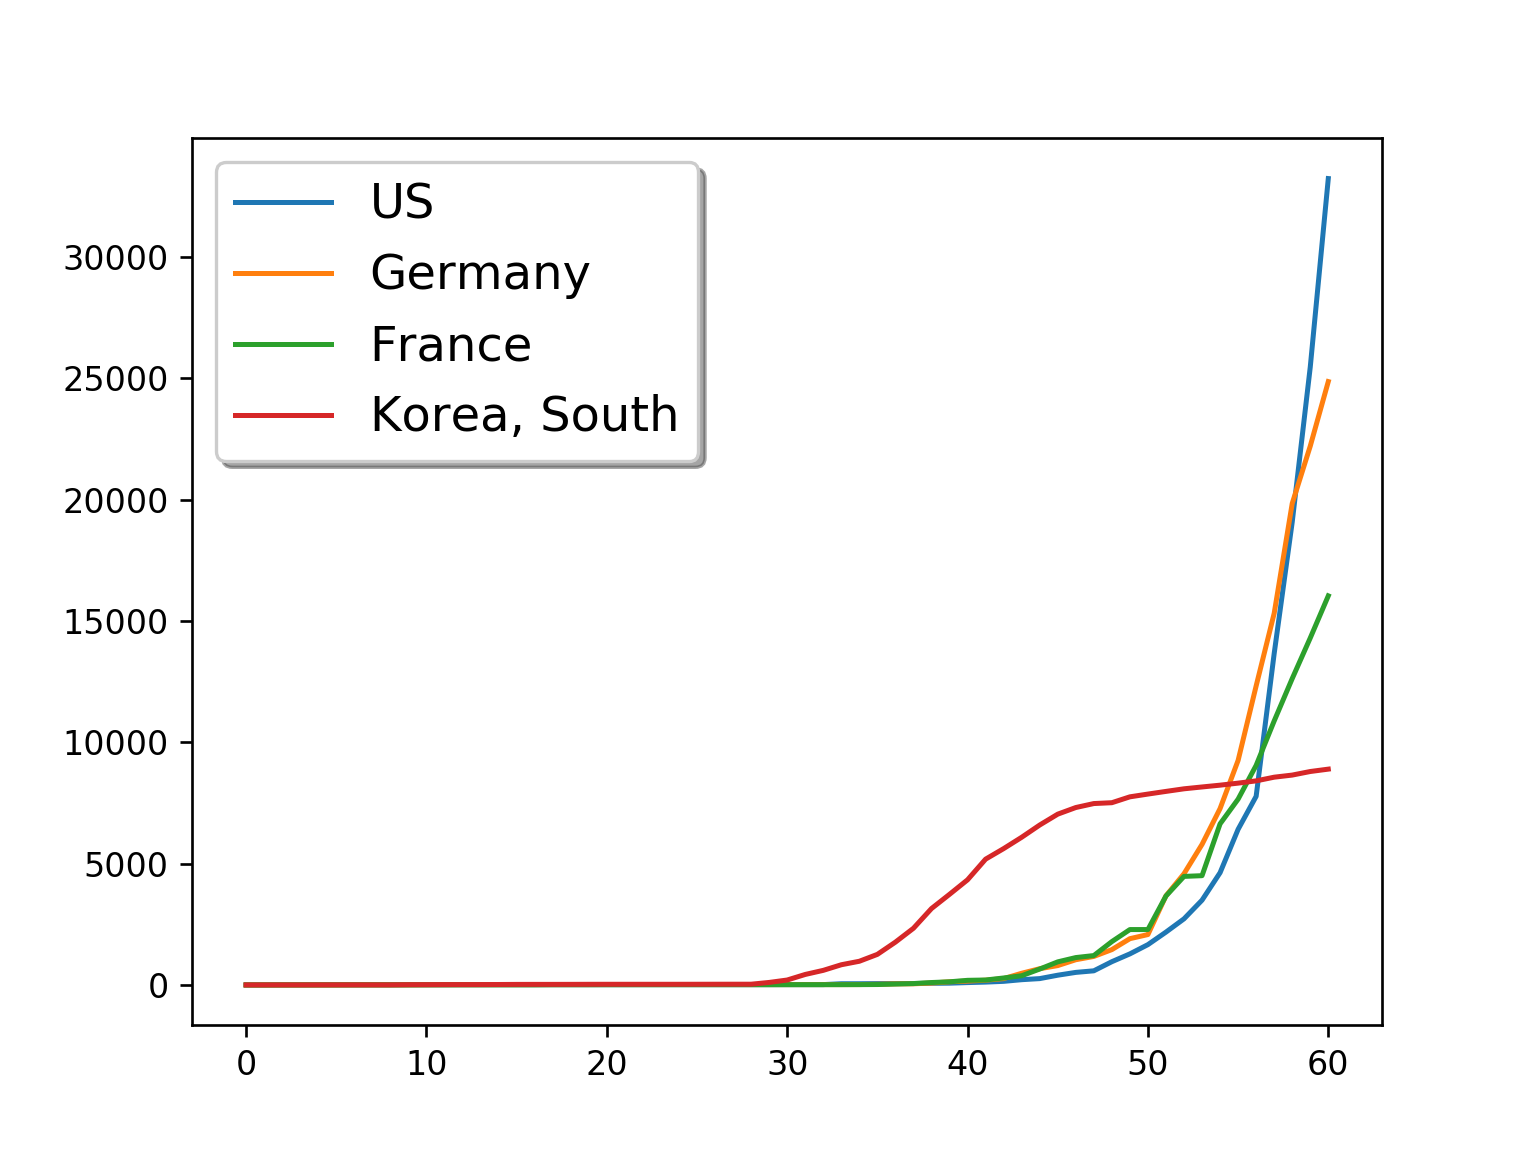

In [23]:
%matplotlib notebook
#del y['China']
#plotcountry(['Korea, South'],0)
plotcountry(yC,['US','Germany','France','Korea, South'],0)

### Fit data to a simple exponential 

In [10]:
# Maybe some day we need this
# 
#
# Define the model function $e^{a\cdot (x-x_0)}$
def model(x,a,x0):
    return np.exp(a*(x-x0))
# Fit to the model
xdata=np.arange(len(yC.get('Germany')))
ydata=yC.get('Italy')
popt,pcov = curve_fit(model,xdata,ydata)
popt
t=np.arange(len(yC.get('Italy')))

<IPython.core.display.Javascript object>


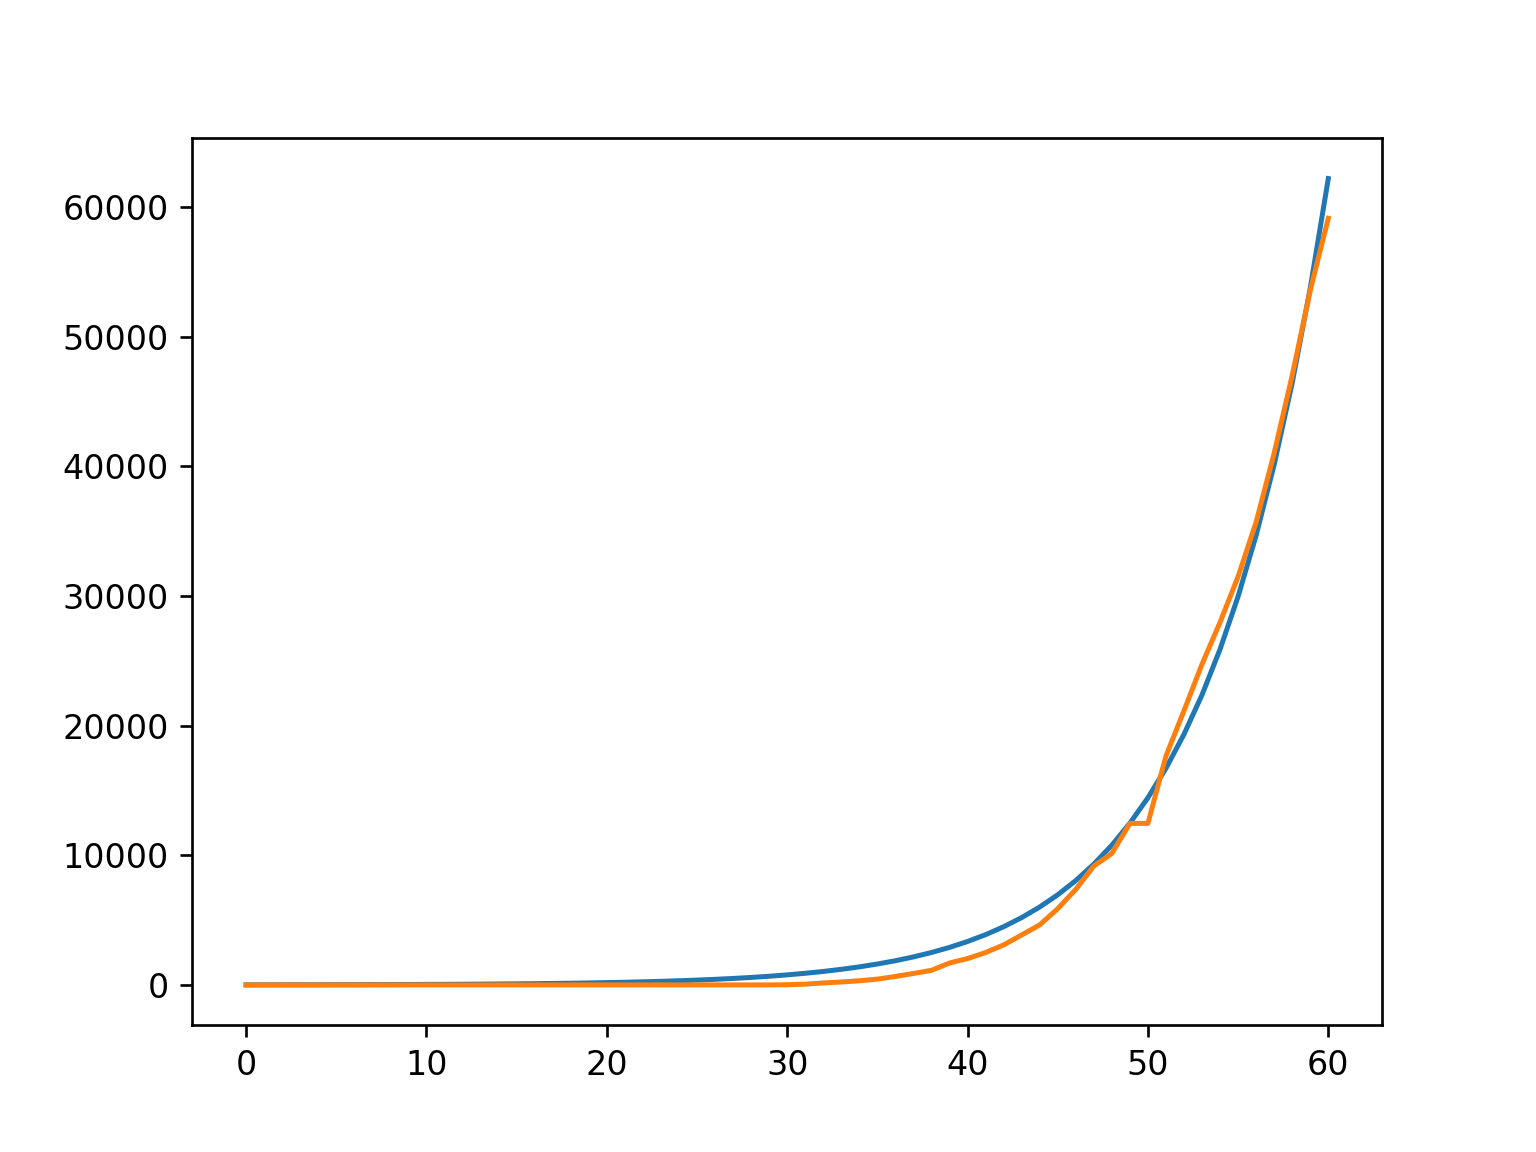

In [11]:
%matplotlib notebook
plt.plot(np.exp(popt[0]*(t-popt[1])))
plt.plot(yC.get('Italy'))

### Save the data

In [5]:
numbered=dict(zip(yC.keys(),np.arange(len(yC.keys()))))
np.save('Numbered.npy',numbered)
yConfirmed=np.array(list(yC.values()),dtype=float)
yDeaths=np.array(list(yD.values()),dtype=float)
yRecovered=np.array(list(yR.values()),dtype=float)
np.savez('CDR_Data.npz',yC=yConfirmed,yD=yDeaths,yR=yRecovered)

In [ ]:
numbered.get('US')

In [20]:
yC['US'][-5:]

array([ 7776, 13662, 19083, 25471, 33242])

In [24]:
len(yC)

124